# Capstone Project Los Angeles Neighbourhood analysis for setting up for Indian cuisine

## Table of contents
* [Introduction](#introduction)
* [Problem Statement](#ProblemStatement)
* [Data Sets](#DataSets)
* [Approach](#approach)
* [Design](#desigh)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: <a name="introduction"></a>

Los Angles is very vibrant, and it is multi-cultural and famous for Hollywood entertainment industry.  Los Angeles is known for its Mediterranean climate and its sprawling metropolis. Los Angeles lies in a basin in Southern California, adjacent to the Pacific Ocean, with mountains as high as 10,000 feet (3,000 m), and deserts.

This data science project is intended to analyse various communities, population, area income limits, age and ethnic groups and pre-existing restaurants and come up with five possible location recommendations for starting Indian cuisine restaurant

## Problem Statement <a name="ProblemStatement"></a>

This data science project is expected to recommend best possible  locations to start Indian cuisine by studying the greater LA demographics, neighbourhood communities, income and various other factors including existing restaurants and their popularity. 
The greater LA is one of the largest cities in united states, and there are different community-based neighbourhoods, it is important to apply data science and arrive at the best possible location for the success of the business.


## Data Sets <a name="DataSets"></a>

1.<b> https://usc.data.socrata.com/ </B>  Organization provides following data sets for public use

	Total population – For each neighbourhood (from 2010 till 2018) <br>
	Census track location for each neighbourhood

2.<B>Foursquare</B> Existing venues in each neighbourhoods

3.<B>Google Geocode API </B> For Extracting the Geo Location for each neighbourhoods


## Approach <a name="approach"></a>

First we are going to do deep analysis on the https://usc.data.socrata.com/ total population data set and Census track data sets and find out what are the highly populated neighbourhoods in LA.

Second we are going to leverage Foursquare API's to get the list of venues in entire Los Angeles neighbourhoods and narrow our analysis only to the top 10 highly populated neighbourhoods

Third we are going to generate top10 most popular venues for each of the neighbourhoods

Fourth, we are going to apply Un-supervised Machine Learning (K-Means Clustering) to cluster the neighbourhoods and finalized the cluster-neighbourhood for our analysis

Finalize the Neighbourhoods, which are highly populated and has most number of top10 popular venues


## Design <a name="desigh"></a>

####  Setp 1  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import time

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 

import types
from botocore.client import Config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

print('Libraries imported.')

Libraries imported.


#### Setp 2 Import DataSets {Los Angeles Neighbourhooods and population details}

#### Now let's import the two data sets, Census_track and Total_Population
<b>Census_track </b> data set has all the Los Angeles neighbourhoods and geo codes <br>
<b>Total_Population </b> data set has from 2010 to 2018 population for each neighbourhood

In [2]:
Census_Tract=pd.read_csv('Census_Tract_LocationsLA_.csv')
Total_Population=pd.read_csv("Total_Population__LA_.csv")

In [3]:
# Census data has multiple geo locations for each neighbourhoods, we need to drop duplicates 
Census_unique=Census_Tract.drop_duplicates(subset=['Neighborhood'])

In [83]:
Census_unique[["Neighborhood","Latitude","Longitude"]].head(3)

,Neighborhood,Latitude,Longitude
0,Tujunga,34.259555,-118.293602
6,Shadow Hills,34.224155,-118.354339
8,Sun Valley,34.210852,-118.348050


In [74]:
Total_Population.head(3)

,Policy Area,Dataset,Variable,Year,Count,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date
0,Demography,Total Population,Total Population,2010,5017.0,Census Tract 1011.10,101110,Tujunga,1400000US06037101110,"(34.25947853, -118.29299909)",Total_Population_2010_1400000US06037101110,01/01/2010
1,Demography,Total Population,Total Population,2010,3663.0,Census Tract 1011.22,101122,Tujunga,1400000US06037101122,"(34.26772618, -118.29015869)",Total_Population_2010_1400000US06037101122,01/01/2010
2,Demography,Total Population,Total Population,2010,6799.0,Census Tract 1012.10,101210,Tujunga,1400000US06037101210,"(34.25297726, -118.29074307)",Total_Population_2010_1400000US06037101210,01/01/2010


Now let's create the top 10 highly populated neighbourhood data set. Use Pandas pivot_table function to create pivot and sort function on 2018 population numbers.

In [75]:
population_pivot=Total_Population.pivot_table(values='Count',index=['Neighborhood'],columns=['Year'],aggfunc=np.sum)
population_pivot = population_pivot.reset_index()
Population_pivot_sorted=population_pivot.sort_values(2018,ascending = False).groupby('Neighborhood').head(1)
Population_pivot_sorted_top10=Population_pivot_sorted.head(10)
Population_pivot_sorted_top10.set_index('Neighborhood', inplace=True)
Population_pivot_sorted_top10.head(10)

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018
Neighborhood,,,,,,,,,
Long Beach,464491.0,465074.0,466201.0,468083.0,471080.0,473084.0,471985.0,472459.0,470990.0
Glendale,191089.0,190718.0,191166.0,193381.0,195380.0,196984.0,197895.0,199750.0,200372.0
Santa Clarita,179009.0,181304.0,184743.0,186384.0,188369.0,190484.0,191708.0,188889.0,190304.0
Palmdale,151700.0,154477.0,157437.0,159248.0,161374.0,162318.0,162126.0,163077.0,162358.0
Lancaster,149533.0,150851.0,153858.0,154872.0,155839.0,156540.0,156585.0,156735.0,155605.0
Pomona,149201.0,149368.0,149928.0,150448.0,151825.0,152022.0,152353.0,152802.0,152823.0
Torrance,143951.0,144622.0,145443.0,146187.0,147181.0,147589.0,147307.0,147190.0,146392.0
Pasadena,138295.0,138719.0,138961.0,139878.0,140781.0,141632.0,141931.0,143113.0,143173.0
East Los Angeles,120507.0,121422.0,124140.0,124858.0,124869.0,122557.0,121361.0,120896.0,117348.0


#### Setp 4 Bar Chart top 10 highly populated neighbourhoods

Text(0.5, 0, 'neighbourhood')

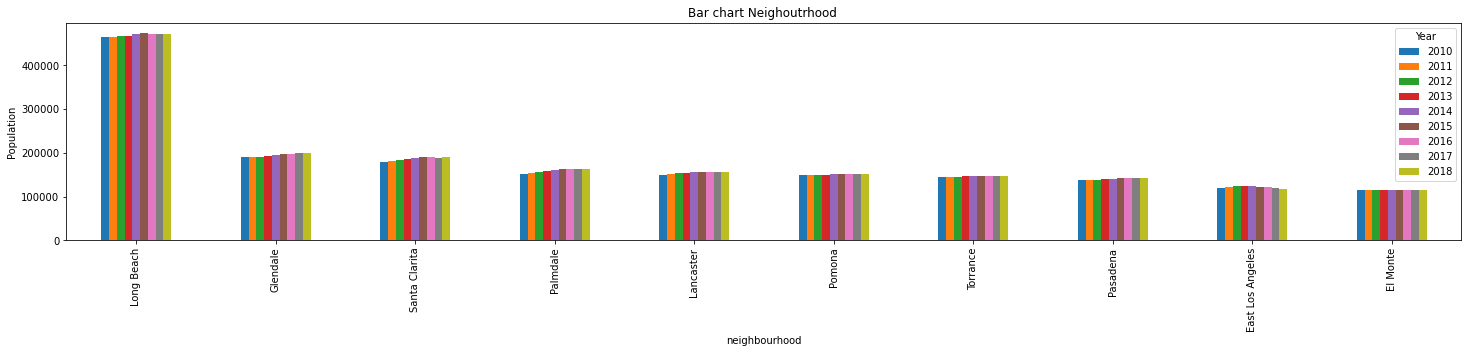

In [7]:
#Bar chart to show the top10 highly populated neighbourhoods
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

Population_pivot_sorted_top10.plot(kind='bar', figsize=(25, 4),)

plt.title('Bar chart Neighoutrhood ')
plt.ylabel('Population')
plt.xlabel("neighbourhood")


#### Setp 5: Pick top10 neighbourhood Geo Coordinates based on top populated neighbourhood
Now we have finalized the top 10 highly populated neighbourhoods, Census_unique data set has geo locations, we need to make use of the both the data sets to get the geo locations for top 10 neighbourhoods.

Python Lambda function appled here


In [8]:
Population_pivot_sorted_top10.reset_index()
top10_populationlist=Population_pivot_sorted_top10.index.to_list()
Census_unique_population_top10=Census_unique[Census_unique.Neighborhood.apply(lambda sentence: any(word in sentence for word in top10_populationlist))]
Census_unique_population_top10.shape

(14, 7)

#### Step 5 Use Folium for visualizing all the LA neighbourhoods
Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

In our case we are going to locate the neighbourhoods with Geo locations on Google maps

In [9]:
# create map of Los Angeles using latitude and longitude values
latitude=Census_unique.iloc[0,5]
longitude=Census_unique.iloc[0,6]

map_LA = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, borough, neighborhood in zip(Census_unique['Latitude'], Census_unique['Longitude'], Census_unique['Tract'], Census_unique['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
print("LA Neighbourhoods")    
map_LA

LA Neighbourhoods


#### Foursquare 

We are going to follow two staged process to obtain Foursquare API

1. <B>Obtain all the Indian restaurants in all the LA neighbourhoods </B>, use the search key word "Indian". First setp obtain the Indian restaurents only in Santa Monica, Los Angeles and then apply the same logic to get all Indian restaurents in LA neighbourhoods

2. <b>Obtain all the venues in LA neighbourhoods from Foursquare</B>

In [10]:
#Foursquare access access
CLIENT_ID = '3K10NH5C1UM1SRAH1IDJBS4TT4CN2LQLNWGFXKR53IU55U4I' # your Foursquare ID
CLIENT_SECRET = 'TWF4UAPNCCQMNIFTZ3GEASEBJCYC41TAGMLVCKF4EVNI4VHC' # your Foursquare Secret
ACCESS_TOKEN = 'JQDR111FYFCOY4ASRNQDFQMFFHA3PPPFUO2YMXOINWNYK5LM' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3K10NH5C1UM1SRAH1IDJBS4TT4CN2LQLNWGFXKR53IU55U4I
CLIENT_SECRET:TWF4UAPNCCQMNIFTZ3GEASEBJCYC41TAGMLVCKF4EVNI4VHC


#### Step 6 Now, let's get the  indian restaurants in Los Angeles - Santa Monica, Los Angeles

In [11]:
#address = 'Artesia, Los Angeles'
#address = 'Long Beach, Los Angeles'
address = 'Santa Monica, Los Angeles'
#address = 'Porter Ranch, Los Angeles'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print(latitude, longitude)

search_query = 'Indian'
radius = 5000
print(search_query + ' .... OK!')

Indian .... OK!


In [12]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=3K10NH5C1UM1SRAH1IDJBS4TT4CN2LQLNWGFXKR53IU55U4I&client_secret=TWF4UAPNCCQMNIFTZ3GEASEBJCYC41TAGMLVCKF4EVNI4VHC&ll=34.0194704,-118.4912273&oauth_token=JQDR111FYFCOY4ASRNQDFQMFFHA3PPPFUO2YMXOINWNYK5LM&v=20180604&query=Indian&radius=5000&limit=30'

In [13]:
# assign relevant part of JSON to venues

results = requests.get(url).json()
# results Jason has all the Indian restaurants
venues = results['response']['venues']

# tranform venues into a dataframe
venues_list=[]
listval=[]
keys=["name", "latitude", "longitude", "crossStreet", "postalCode", ""]
dataframe = pd.json_normalize(venues)
#print(dataframe)
for index, row in dataframe.iterrows():
    name=row['name']
    latitude=row['location.lat']
    longitude=row['location.lng']
    crossStreet=row['location.formattedAddress']
    postalCode=row['location.postalCode']
    listval=[name,latitude,longitude,crossStreet,postalCode]
    venues_list.append((dict(zip(keys, listval))))
nearby_venues=pd.DataFrame(venues_list)
print("Indian Restaurenets in Santa Monica, Los Angeles ")
nearby_venues.head(5)

Indian Restaurenets in Santa Monica, Los Angeles 


,name,latitude,longitude,crossStreet,postalCode
0,Indian Paintbrush,34.019237,-118.482421,"[1660 Euclid St, Santa Monica, CA 90404, Unite...",90404
1,Taos Indian Trading Co,34.016811,-118.494713,"[403 Santa Monica Blvd, Santa Monica, CA 90401...",90401
2,Bombay Indian,33.988618,-118.474857,"[1301 Ocean Front Walk (Boardwalk), Venice, CA...",90291
3,Tumbi,34.014500,-118.497586,"[115 Santa Monica Blvd (Ocean), Santa Monica, ...",90401
4,Indian Springs,34.044915,-118.457742,"[Los Angeles, CA 90025, United States]",90025


In [14]:
#Foursquare API returned 19 Indian restaurenets in Santa Monca neighbourhood
nearby_venues.shape

(19, 5)

#### Step 7 : In google map locate all the 19 India restaurants in Santa Monica area

In [15]:
# create map of Los Angeles using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nearby_venues['latitude'], nearby_venues['longitude'], nearby_venues['name'], nearby_venues['crossStreet']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
print("Indian Restaurenets in Santa Monica neighbourhoods")     
map_toronto

Indian Restaurenets in Santa Monica neighbourhoods


In [16]:
#function to get all the Indian restaurants in LA Neighbourhoods using Foursquare with Search query "Indian"
def getindianrestaurants(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    count=1
    for neighbourhood, lat, lng in zip(names, latitudes, longitudes):
        print("iteration", count,neighbourhood)
        count=count+1            
        address = neighbourhood
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        latitude = lat
        longitude = lng
        search_query = 'Indian'
        radius = 10000
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
        listval=[]
        keys=["neighbourhood","restaurent", "latitude", "longitude", "crossStreet", "postalCode"]
            
        # make the GET request
        results = requests.get(url).json()
        if results:
            time.sleep(5)
            #print(results)
            venues1 = results['response']['venues']
            #print(venues)
            dataframe = json_normalize(venues1)

            #print(dataframe)
            # return only relevant information for each nearby venue
            for index, row in dataframe.iterrows():
                 neighbourhood=neighbourhood
                 name=row['name']
                 latitude=row['location.lat']
                 longitude=row['location.lng']
                 crossStreet=row['location.formattedAddress']
                 postalCode=row['location.postalCode']
                 listval=[neighbourhood,name,latitude,longitude,crossStreet,postalCode]
                 venues_list.append((dict(zip(keys, listval))))
    restaurants=pd.DataFrame(venues_list)
    return(restaurants)

In [17]:
#Get all the Indian restaurenets in top populated neighbourhoods
Census_unique_population_top10.head(10)
Census_unique_population_top101=Census_unique_population_top10[~Census_unique_population_top10.Neighborhood.str.contains("South El Monte")]
Census_unique_population_top101.shape

LA_restaurants = getindianrestaurants(names=Census_unique_population_top101['Neighborhood'],
                                   latitudes=Census_unique_population_top101['Latitude'], 
                                   longitudes=Census_unique_population_top101['Longitude']
                                  )

iteration 1 Glendale


<ipython-input-16-ad8b66429161>:30: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues1)


iteration 2 Pomona
iteration 3 El Monte
iteration 4 Pasadena
iteration 5 East Pasadena
iteration 6 South Pasadena
iteration 7 East Los Angeles
iteration 8 Long Beach
iteration 9 Torrance
iteration 10 Lancaster
iteration 11 Palmdale
iteration 12 Northwest Palmdale
iteration 13 Santa Clarita


#### Our analysis reveal following neighbourhoods having most number of Indian restaurents

In [27]:
print("Neighbourhoods with most number of Indian Restaurents")
LA_restaurants1=LA_restaurants.drop_duplicates(subset=["restaurent"])
Indian_restaurants_unique=LA_restaurants1.copy()
LA_restaurants1["neighbourhood"].value_counts()

Neighbourhoods with most number of Indian Restaurents


Long Beach          28
Pomona              24
Torrance            21
South Pasadena      16
El Monte            12
East Los Angeles     7
Glendale             7
Pasadena             4
Lancaster            3
Santa Clarita        1
Name: neighbourhood, dtype: int64

In [28]:
Indian_restaurants_unique.head(5)

,neighbourhood,restaurent,latitude,longitude,crossStreet,postalCode
0,Glendale,Indian Wedding Market,34.188482,-118.320694,"[517 (Fox Court West), Redwood City, CA, CA 94...",94061
1,Glendale,Indian Springs Ranch,34.323645,-118.338524,"[Indian Springs, CA, United States]",NaN
2,Glendale,Indian Springs,34.276342,-118.378183,"[California, United States]",NaN
3,Glendale,Indian Rhinoceros,34.149548,-118.291794,"[5333 Zoo Dr (at Los Angeles Zoo), Los Angeles...",90027
4,Glendale,Indianola Trick Or Treat Street,34.206277,-118.190698,"[La Cañada Flintridge, CA 91011, United States]",91011


#### Step 8 there are 123 Indian restaurants in LA (top 10 populated neighbourhoods), depict them in google maps

In [29]:
# create map of Los Angeles  using latitude and longitude values
map_LA = folium.Map(location=[latitude, longitude], zoom_start=10)
# create map of Los Angeles using latitude and longitude values
map_LA = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(Indian_restaurants_unique['latitude'], Indian_restaurants_unique['longitude'], Indian_restaurants_unique['restaurent'], Indian_restaurants_unique['crossStreet']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
print("Indian Restaurenets in top 10 highly populated LA neighbourhoods")  
map_LA

Indian Restaurenets in top 10 highly populated LA neighbourhoods


#### Step 9, Now we are going to extract all the Venues in each LA Neighbourhoods, 

Foursquare API will respond with venue,venue category and geo location all the venues in all the LA neighbourhoods

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [31]:
#function to call the Foursquare API
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
## Get all the venues in LA 
LA_venues = getNearbyVenues(names=Census_unique['Neighborhood'],
                                   latitudes=Census_unique['Latitude'], 
                                   longitudes=Census_unique['Longitude']
                                  )

In [33]:
LA_venues.to_csv("C:\\Users\gerobins\Documents\Data Science Professional Certificate\capstone\Project data set\LA_venues.csv")
LA_venues=pd.read_csv("LA_venues.csv")
print("All the Venues in LA neighbourhoods")
LA_venues.head(5)

All the Venues in LA neighbourhoods


,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Tujunga,34.259555,-118.293602,Commercial Cool Roof Systems,34.261556,-118.291594,Construction & Landscaping
1,1,Tujunga,34.259555,-118.293602,Shoot Club,34.256886,-118.293161,Gaming Cafe
2,2,Tujunga,34.259555,-118.293602,Canyon Market & Liquor,34.263107,-118.294111,Liquor Store
3,3,Tujunga,34.259555,-118.293602,Glitzerland,34.258862,-118.288271,Arts & Crafts Store
4,4,Sun Valley,34.210852,-118.348050,U-Haul Moving & Storage of Sun Valley,34.211351,-118.349032,Storage Facility


#### Step 10 Neighbourhoods which has more number of restaurents
Now we have all the venues in Los Angeles, now lets' find out how many of them are Restaurent type and which neighbourhood has more number of restaurents

In [34]:
#Search for restaurent keyword in venue category and 
venue_catagory=LA_venues["Venue Category"].value_counts()
venue_category_df=venue_catagory.to_frame()
venuelist=venue_category_df.index.to_list()
restaurenetvenues=venuelist
restaurents=[]
matching = [s for s in restaurenetvenues if "Restaurant" in s]
restaurents=LA_venues[LA_venues["Venue Category"].apply(lambda sentence: any(word in sentence for word in matching))]
print("Neighbourhoods which has more number of restaurents")
series1=restaurents["Neighborhood"].value_counts()
df1=series1.to_frame()
df1.head(10)

Neighbourhoods which has more number of restaurents


,Neighborhood
East Hollywood,16
Harvard Heights,15
Arlington Heights,13
Pico-Union,13
Artesia,12
Koreatown,12
University Park,11
Pico-Robertson,11
Atwater Village,11
Monterey Park,10


Neighbourhoods with more number of restaurents


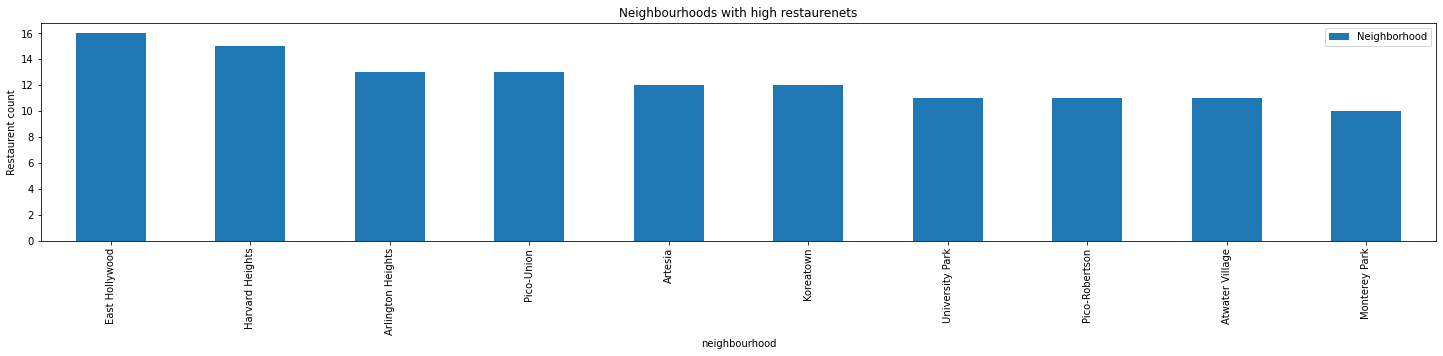

In [35]:
#Bar plat top neighbourhoods with high number of restaurents
df2=df1.head(10)
df2.plot(kind='bar', figsize=(25, 4),)
plt.title('Neighbourhoods with high restaurenets')
plt.ylabel('Restaurent count')
plt.xlabel("neighbourhood")
print("Neighbourhoods with more number of restaurents")

In [36]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [37]:
print('{} venues were returned by Foursquare.'.format(LA_venues.shape[0]))

2160 venues were returned by Foursquare.


In [38]:
print('There are {} uniques categories.'.format(len(LA_venues['Venue Category'].unique())))

There are 313 uniques categories.


#### Step 10 Analyze Each Neighborhood - Data Preprocessing
#### one hot encoding
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML 
algorithms to do a better job in prediction

In [129]:
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['Neighborhood'] = LA_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,Neighborhood,ATM,Adult Boutique,Airport Service,Airport Terminal,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cable Car,Café,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Gym,College Rec Center,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mental Health Office,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Notary,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Plane,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Stables,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tailor Shop,

#### Step 11 Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [130]:
LA_grouped = LA_onehot.groupby('Neighborhood').mean().reset_index()
LA_grouped.head(5)

,Neighborhood,ATM,Adult Boutique,Airport Service,Airport Terminal,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Basketball Stadium,Bath House,Bathing Area,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cable Car,Café,Campground,Candy Store,Car Wash,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Gym,College Rec Center,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dive Spot,Doctor's Office,Dog Run,Donburi Restaurant,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mental Health Office,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Notary,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Pawn Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Plane,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,Road,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Stables,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tailor Shop,

In [131]:
LA_grouped.shape

(230, 314)

#### Let's print each neighborhood along with the top 5 most common venues

In [132]:
num_top_venues = 5

for hood in LA_grouped['Neighborhood']:
    #print("----"+hood+"----")
    temp = LA_grouped[LA_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

In [133]:
#### Let's put that into a _pandas_ dataframe

In [134]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [135]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = LA_grouped['Neighborhood']

for ind in np.arange(LA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(LA_grouped.iloc[ind, :], num_top_venues)
print("Neighbourhoods with most common venues")
neighborhoods_venues_sorted.head(2)

Neighbourhoods with most common venues


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams-Normandie,Playground,Taco Place,Indie Theater,Gas Station,Yoga Studio,Filipino Restaurant,Event Space,Fabric Shop,Farm,Farmers Market
1,Agoura Hills,Yoga Studio,French Restaurant,Dry Cleaner,Park,Thai Restaurant,Car Wash,Pizza Place,Ramen Restaurant,Farm,English Restaurant


In [136]:
#Now let's pick the neighbourhoods which are highly populated. This will help us to narrow down, instead of analysing all the venues in 
#LA venues
neighborhoods_venues_sorted["Neighborhood"].value_counts()
neighborhoods_venues_sorted_top10=neighborhoods_venues_sorted.copy()
neighborhoods_venues_sorted_top10=neighborhoods_venues_sorted_top10[neighborhoods_venues_sorted_top10["Neighborhood"].apply(lambda sentence: any(word in sentence for word in top10_populationlist))]
neighborhoods_venues_sorted_top10.shape
LA_grouped_to10=LA_grouped.copy()
LA_grouped_to10=LA_grouped_to10[LA_grouped_to10["Neighborhood"].apply(lambda sentence: any(word in sentence for word in top10_populationlist))]
LA_grouped_to10.shape

(12, 314)

### Step 12. Cluster Neighborhoods

<B><u> k-means clustering</b></u> is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

In [137]:
neighborhoods_venues_sorted["Neighborhood"].value_counts()
neighborhoods_venues_sorted_top10=neighborhoods_venues_sorted.copy()
neighborhoods_venues_sorted_top10=neighborhoods_venues_sorted_top10[neighborhoods_venues_sorted_top10["Neighborhood"].apply(lambda sentence: any(word in sentence for word in top10_populationlist))]

LA_grouped_to10=LA_grouped.copy()
LA_grouped_to10=LA_grouped_to10[LA_grouped_to10["Neighborhood"].apply(lambda sentence: any(word in sentence for word in top10_populationlist))]


use elbow curve method to determine number of clustomers


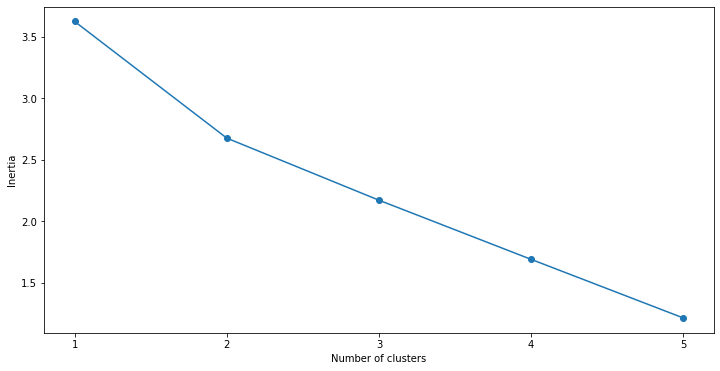

In [138]:
# fitting multiple k-means algorithms and storing the values in an empty list
#**kmeans_kwargs
#init='k-means++
SSE = []
LA_grouped_clustering = LA_grouped_to10.drop('Neighborhood', 1)
for cluster in range(1,6):
    kmeans = KMeans(n_clusters = cluster,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(LA_grouped_clustering)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,6), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks([1,2,3,4,5])

print("use elbow curve method to determine number of clustomers")

In [139]:
# set number of clusters
kclusters = 4


LA_grouped_clustering = LA_grouped_to10.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
print("kmeans.inertia",kmeans.inertia_)

kmeans.inertia 1.6913114134542702


In [140]:
# add clustering labels
neighborhoods_venues_sorted_top10.insert(0, 'Cluster Labels', kmeans.labels_)


Census_unique_population_top10_clustered=Census_unique_population_top10.join(neighborhoods_venues_sorted_top10.set_index("Neighborhood"), on='Neighborhood')
df4=Census_unique_population_top10_clustered.dropna(axis=0, subset=['Cluster Labels'])
df4.shape

(12, 18)

In [154]:
df4.head(12)
df4.to_csv("clustered.csv")

#### Step 16 clusters in Google Map

In [152]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df4['Latitude'], df4['Longitude'], df4['Neighborhood'], df4['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    cluster=int(cluster)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### step 17 cluster analysis

In [146]:
neighborhoods_venues_sorted_top10.Neighborhood

54       East Los Angeles
55          East Pasadena
58               El Monte
70               Glendale
105             Lancaster
112            Long Beach
134    Northwest Palmdale
147                Pomona
164         Santa Clarita
173        South El Monte
176        South Pasadena
189              Torrance
Name: Neighborhood, dtype: object

In [144]:
print("There are Four clusters and 0-3 and their correcponding number of neighbourhoods")
neighborhoods_venues_sorted_top10["Cluster Labels"].value_counts()

There are Four clusters and 0-3 and their correcponding number of neighbourhoods


0    9
3    1
2    1
1    1
Name: Cluster Labels, dtype: int64

## Results and Discussion <a name="results"></a>
<u> Cluster 0 </u> has, totally nine neighbourhoods, all the cluster 0 neighbourhoods have at least 3 "restaurents" as most common venue 

 <u> Clusters 3,2,1 </u> are not having restaurenets as common venues. mostly they are having formers market, parks and Yoga studio as common venues



## Conclusion <a name="conclusion"></a>

Our first part of the analysis revealed there are 14 neighbourhoods, which are highly populated. 

once we cluster these 14 neighbourhoods, we are able to narrow down to 9 neighbourhoods which are having most common venue as "Restaurants" and are highly populated.

<i><u>East Los Angeles,East Pasadena,El Monte,Glendale,Lancaster,Long Beach,Northwest Palmdale,Pomona,Santa Clarita,South El Monte,South Pasadena,Torrance</i></u>

Since we are interested in setting up Indian restaurants, our Foursquare, API revealed following top 4 neighbourhoods having highest number of Indian restaurants

Long Beach -        28 <br>
Pomona  -           24 <br>
Torrance -          21<br>
Pasadena  -         16 <br>



Hence  we recommend these are the best suited top 4 neighbourhoods which are highly populated, and having restaurants as top venues and having most number of Indian Restaurants






